<a href="https://colab.research.google.com/github/vlasd45/web102/blob/main/%D0%94%D0%972.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
!pip install scikit-plot


In [22]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import scikitplot as skplt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn import metrics

In [23]:
mnist = fetch_openml(data_id=554) # hhtps://www.openml.org/d/554

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [27]:
type(mnist.data), type(mnist.categories), type(mnist.feature_names), type(mnist.target)

(pandas.core.frame.DataFrame, NoneType, list, pandas.core.series.Series)

In [28]:
data = np.array(mnist.data)
targets = np.array(mnist.target)

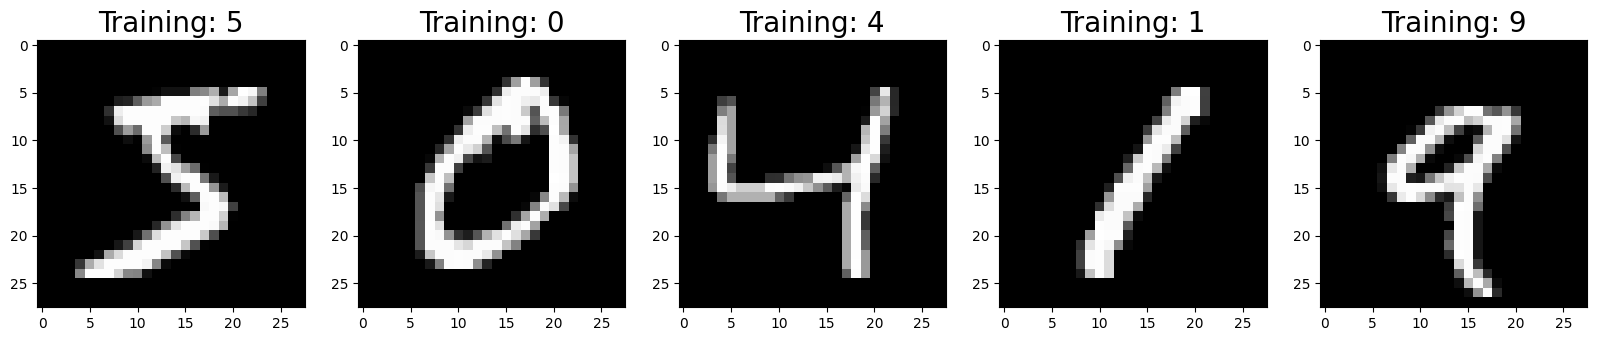

In [37]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(data[0:5],
                                           targets[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Training: ' + label, fontsize = 20);

In [42]:
X_train, X_test, y_tarin, y_test = train_test_split(data[:10000,:],
                                                   targets[:10000].astype('int'),
                                                   test_size=1/7.0,
                                                   random_state=0)

In [43]:
X_train.shape, X_test.shape

((8571, 784), (1429, 784))

In [46]:
#Код инциализации модели
clf = LogisticRegression(solver='saga', penalty='l2', n_jobs=5, tol=0.01, max_iter=1000)


In [47]:
#Код обучения модели
clf.fit(X_train, y_tarin)

LogisticRegression(max_iter=1000, n_jobs=5, solver='saga', tol=0.01)

In [48]:
#Проверка модели
y_pred = clf.predict(X_test)

In [49]:
accuracy = np.mean(y_pred == y_test)

print('Test accuracy: %.5f' % accuracy)
assert accuracy > 0.9, 'попробуйте изменить парметры ввода: penalty, solver'

print('Good job!')

Test accuracy: 0.90623
Good job!


In [51]:
# Calculate F1-score
f1 = f1_score(y_test, y_pred, average='weighted')
print('F1-score:', f1)

F1-score: 0.9061987452045774


In [52]:
#Calculate accuracy
accuracy = accuracy_score(y_test, y_pred,)
print('Accuracy:', accuracy)

Accuracy: 0.9062281315605318


In [53]:
#Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')
print('Precision:', precision)

Precision: 0.9068542234362652


<Axes: title={'center': 'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

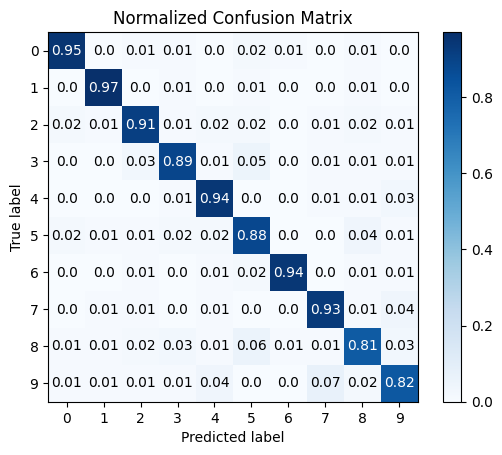

In [55]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)

In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       146
           1       0.96      0.97      0.97       145
           2       0.89      0.91      0.90       131
           3       0.91      0.89      0.90       168
           4       0.91      0.94      0.93       145
           5       0.82      0.88      0.85       128
           6       0.99      0.94      0.96       157
           7       0.89      0.93      0.91       137
           8       0.86      0.81      0.84       135
           9       0.86      0.82      0.84       137

    accuracy                           0.91      1429
   macro avg       0.90      0.90      0.90      1429
weighted avg       0.91      0.91      0.91      1429

